<h1>Titanic Data</h1>

In 1912, the RMS Titanic sank on her maiden voyage across the North Atlantic, killing over 1500 people. In this exercise, I want to examine a sample of passenger data to determine the extent to which gender, class, and age played a role in whether an individual survived or not. My initial hypothesis is that all three of those factors are correlated with survivial to some extent. 

<h2>References</h2>

To prepare this analysis, I relied heavily on the Matplotlib, Pandas, and Numpy documentation. Also, Google and StackOverflow were invaluable as references for how to make fine-tuned adjustments to the graphs. Most of the code for the graphs in this report was based on the example code in the Matplotlib documention.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/users/thomasfieber/Projects/Udacity/Intro-to-programming/Data Analysis/'
t_df = pd.read_csv(path + 'titanic_data.csv')

# Setting the parameters for graphs in this notebook
%pylab inline
params = {
    'figure.figsize': (10, 6),
    'font.size': 14,
    'font.weight': 'bold',
    'legend.fontsize': 14,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14
}
pylab.rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib


In [54]:
labels=['children','young_adult','middle_age','older_middle_age','senior']
t_df['age_groups'] = pd.cut(t_df['Age'], [13, 25, 40, 50, 60, 120], labels=labels)

In [76]:
ages = t_df[t_df.Survived == 1].groupby(['age_groups'])

In [75]:
ages

array([[  3.52200000e+04,   8.20000000e+01,   1.66000000e+02,
          1.66500000e+03,   4.10000000e+01,   4.80000000e+01,
          4.04780020e+03],
       [  1.73340000e+04,   3.30000000e+01,   4.70000000e+01,
          1.51500000e+03,   1.40000000e+01,   1.00000000e+01,
          2.07177110e+03],
       [  8.82100000e+03,   1.70000000e+01,   1.90000000e+01,
          9.34000000e+02,   1.00000000e+01,   7.00000000e+00,
          1.13456250e+03],
       [  2.79200000e+03,   5.00000000e+00,   8.00000000e+00,
          3.30000000e+02,   1.00000000e+00,   0.00000000e+00,
          2.08045800e+02],
       [  4.90250000e+04,   1.11000000e+02,   2.01000000e+02,
          3.59450000e+03,   4.00000000e+01,   3.40000000e+01,
          6.36303320e+03]])

<h2>Methodology</h2>

<h3>Research Questions</h3>

There are a lot of ways this data could be analyzed with regard to survival. I am going to examine how gender, class, and age impacted survival. I want to know:

    - How does a passenger's gender contribute to their chances for survival?
    - Are higher class passengers more likely to survive than lower class passengers?
    - What were the survival rates for different age groups by class?
    
There are many other experiements one could do with this data, however due to personal and professional time constraints, I will limit my exmaination to these three factors. 

My initial hypothesis is that gender will have the strongest correlation with survival, with class and age having weaker, but not insignificant impacts on survival probability. I expect that first class women will be more likely to survive than any other group, however I expect children to have high survival rates across classes. 

<h3>Limitations</h3>

This examination only considered a relatively small sample of the total Titanic passengers. As such, the findings I present here are tentative, and may vary when my methods are applied to a larger sample size. Additionally, this is an informal evaluation, and while I will attempt to apply basic statistical concepts, I will not dive into rigorous mathematical proofs or advanced probability theory. 

<h3>Cleaning the Data</h3>

Initially, there were a number of blank entries in the "Cabin", "Ticket", "Name", and "PassengerId" columns. Since I wanted to get rid of as many blank entries as possible, and I did not consider those factors especially relevant to my research question, I dropped those columns from the dataframe. After removing those columns, there were still a number of empty entries for age. Since I did want to examine age with respect to survival rates, I replaced all NaN in the 'Age' column with the mean ages for that passenger's class and gender. I expect this may skew my analysis slightly with regard to age, however I believe leaving those records intact, given the large number that would have been missing otherwise, will yield more accurate results overall. 

I could have removed more columns, since in this examination I was not concerned with correlating port of embarkation or number of siblings with survival, but I did not. 

In [2]:
# Drop the 'Cabin', 'Ticket', 'Name', and 'PassengerId' columns
t_df = t_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

t_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
# Find the number and details of entries with missing ages
missing_ages = t_df[t_df['Age'].isnull()]

missing_ages

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [4]:
# Find the mean ages for passengers by sex and class. This was covered in class
mean_ages = t_df.groupby(['Sex','Pclass'])['Age'].mean()

# Initially, I was stuck on how to replace the ages in the DataFrame with the 
# appropriate average for the given gender and class, but some time on Google and
# StackOverflow helped me tweak my initial function so it works properly.
def replace_ages(entry):
    '''
    This function takes in one argument, which in this case will be an element in 
    our dataframe. The function checks if the age field in the element is empty, and if it is, 
    the function applies the mean age for that element's gender ('Sex') and class ('Pclass') 
    '''
    if pd.isnull(entry['Age']):
        return mean_ages[entry['Sex'],entry['Pclass']]
    else:
        return entry['Age']
    
# Apply the replace_ages function to the 'Age' column in the DataFrame
t_df['Age'] = t_df.apply(replace_ages, axis=1)

We will start with a sample size of 891 passengers. 

In [5]:
total_passengers = len(t_df)
print("Total passengers in sample: {}".format(total_passengers))

Total passengers in sample: 891


<h3>Survival Data</h3>

In [6]:
# Since survivors are represented by 1's, summing the 'Survived' column will
# return the total number of survivors.

lived = t_df['Survived'].sum()
died = total_passengers - lived

print("Survived: {}\nDied: {}".format(lived, died))

Survived: 342
Died: 549


Here we can see that of the passengers represented in this sample, 342 lived, and 549 died. 

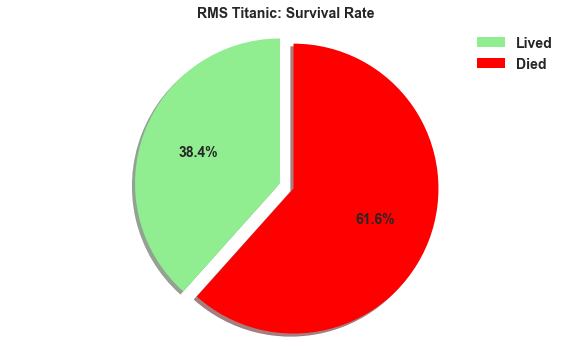

In [7]:
# Create a pie chart to show survival percentage on Titanic
survived = plt.subplot()
sizes = [lived, died]
explode = (0.1, 0.0)
survived.pie(sizes, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, colors=['lightgreen', 'red'])
survived.axis('equal')
survived.legend(['Lived', 'Died'])
survived.set_title('RMS Titanic: Survival Rate')
plt.show()

This graph represents the percentage of passengers in the sample who lived and died. The survivors represented approximately 38.4% of the total passengers.

<h3>Analysis of Survival by Gender</h3>

Now I want to begin looking at the gender breakdown aboard the Titanic. My initial hypothesis is that the survival rate for women was higher than for men, but I want to get a good idea of the gender breakdown to determine what percentage of passengers were men, and what percentage were women. 

577
314


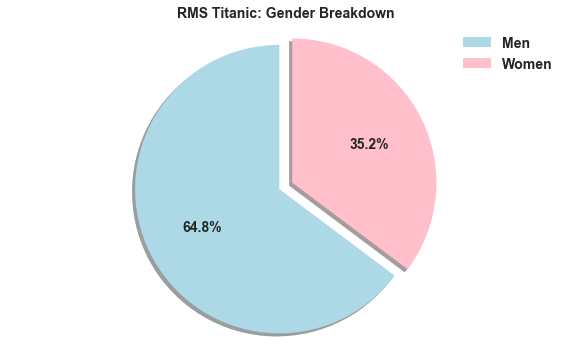

In [8]:
# Group data by gender
total_genders = t_df.groupby(['Sex'])

# Calculate the number of men and women in the sample
total_men = len(total_genders.groups['male'])
total_women = len(total_genders.groups['female'])
print(total_men)
print(total_women)
# Create a pie chart to show the percentage breakdown of men and women aboard the Titanic
gender = plt.subplot()
sizes = [total_men, total_women]
explode = (0.0, 0.1)
gender.pie(sizes, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, colors=['lightblue', 'pink'])
gender.axis('equal')
gender.legend(['Men', 'Women'])
gender.set_title("RMS Titanic: Gender Breakdown")
plt.show()

109
233


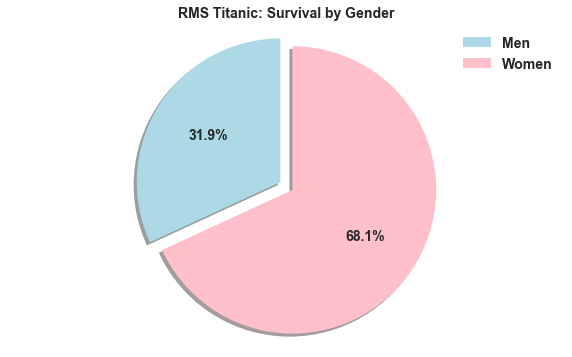

In [9]:
survivors_by_gender = t_df.groupby(['Sex']).Survived.sum()

male_survivors = survivors_by_gender['male']
female_survivors = survivors_by_gender['female']

print(male_survivors)
print(female_survivors)

survivors_gender = plt.subplot()
sizes = [male_survivors, female_survivors]
explode = (0.1, 0.0)
survivors_gender.pie(sizes, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, \
                     colors=['lightblue', 'pink'])
survivors_gender.axis('equal')
survivors_gender.legend(['Men', 'Women'])
survivors_gender.set_title("RMS Titanic: Survival by Gender")
plt.show()

Here we can see that although men made up approximtely 64.8% of the original passengers in this sample, only 31.9% of the survivors were male. Given the original 577 men in the sample, and only 109 male survivors, this suggests a survival rate for men of just under 19% (~18.89%). Conversely, women appear to have been much more likely to survive. With 314 original women in the sample, and 233 female survivors, the survival rate for women was just over 74% (~74.20%). 

In [10]:
# Probability of being female
prob_female = total_women / total_passengers
# Probability of survival given female 
prob_surv_female = female_survivors / total_women
# Probability of female given survival
prob_female_surv = female_survivors / lived
# Probability of not female
prob_not_female = total_men / total_passengers
# Probability of survival
prob_surv = lived / total_passengers

# Now calculate the same probabilities for men
prob_male = total_men / total_passengers
prob_surv_male = male_survivors / total_men
prob_male_surv = male_survivors / lived
prob_not_male = total_women / total_passengers

# Print out values
print("Probability values for women")
print("P(F): {}".format(prob_female))
print("P(S|F): {}".format(prob_surv_female))
print("P(F|S): {}".format(prob_female_surv))
print("P(not F): {}".format(prob_not_female))
print("\n----------\n")
print("Probability values for men")
print("P(M): {}".format(prob_male))
print("P(S|M): {}".format(prob_surv_male))
print("P(M|S): {}".format(prob_male_surv))
print("P(not M): {}".format(prob_not_male))
print("\n----------\n")
print("Overall probability of survival")
print("P(S): {}".format(prob_surv))

Probability values for women
P(F): 0.35241301907968575
P(S|F): 0.7420382165605095
P(F|S): 0.6812865497076024
P(not F): 0.6475869809203143

----------

Probability values for men
P(M): 0.6475869809203143
P(S|M): 0.18890814558058924
P(M|S): 0.31871345029239767
P(not M): 0.35241301907968575

----------

Overall probability of survival
P(S): 0.3838383838383838


So we can calculate the probability of survival given a female passenger as follows.

P(S | F) = (P(F | S) * P(S)) / P(F)

So P(S | F) = (prob_female_suv * prob_surv) / prob_female

In [11]:
# Probability of survival for women
female_prob_of_survival = (prob_female_surv * prob_surv) / prob_female
print("Probability of female survival: {}".format(female_prob_of_survival))

# Probability of survival for men
male_prob_of_survival = (prob_male_surv * prob_surv) / prob_male
print("Probability of male survival: {}".format(male_prob_of_survival))

Probability of female survival: 0.7420382165605095
Probability of male survival: 0.18890814558058924


This is consistent with what I observed in the data above. Here I have shown that the probability of survival given a female passenger was ~74.20%. Calculating out the probability of survival given a male passenger was again fairly consistent with I observed in the data earlier; despite a MUCH larger probability that any one passenger would be male, the probability of survival given a male passenger was ~18.89%. 

This suggests that gender and survival are very strongly correlated. 

This partially confirmed my initial hypothesis that gender would have an impact on survival (specifically that women were more likely to survive), but it was still unclear to what extent class impacted survival probability. The numbers above only reflected gender, and did not account for any difference in class. To examine survivability by class, I broke the data down into groups by class and gender, and looked at survival rates for first, second, and third classes. I expected survival rates for first class to be much higher for men and women.

<h3>Analysis of Survival by Class</h3>

In [12]:
breakdown_by_class = t_df.groupby(['Pclass'])

first = len(breakdown_by_class.groups[1])
second = len(breakdown_by_class.groups[2])
third = len(breakdown_by_class.groups[3])

print("Total First Class: {}".format(first))
print("Total Second Class: {}".format(second))
print("Total Third Class: {}".format(third))

Total First Class: 216
Total Second Class: 184
Total Third Class: 491


This first chart breaks down the total passengers by class. As depicted, first class (216 passengers) accounted for 24.2% of the sample, second class (184 passengers) 20.7%, and third class (491 passengers), the remaining 55.1%

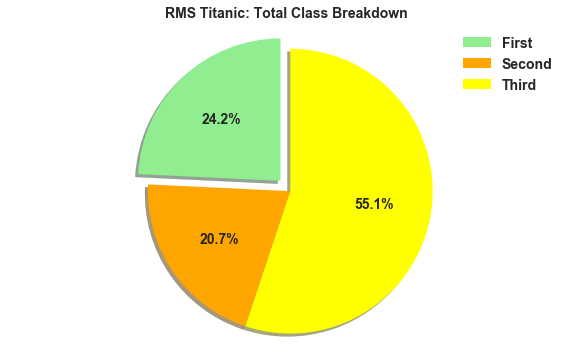

In [13]:
total_class = plt.subplot()
sizes = [first, second, third]
explode = (0.1, 0.0, 0.0)
total_class.pie(sizes, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, \
                colors=['lightgreen', 'orange', 'yellow'])
total_class.axis('equal')
total_class.legend(['First', 'Second', 'Third'])
total_class.set_title("RMS Titanic: Total Class Breakdown")
plt.show()

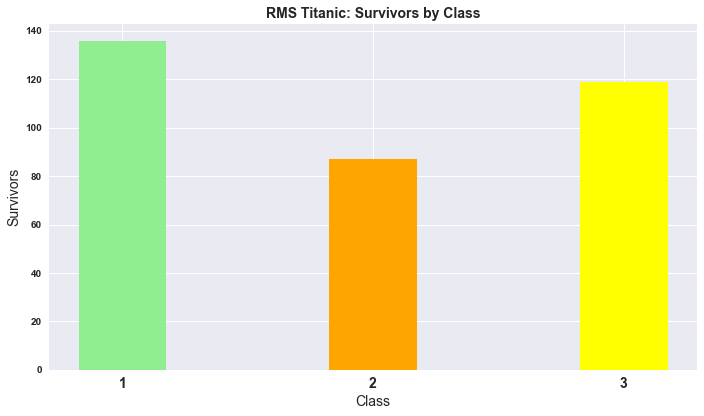

In [14]:
survivors_by_class = breakdown_by_class.Survived.sum()

n = 3
values = (survivors_by_class[1], survivors_by_class[2], survivors_by_class[3])

fig, class_gender = plt.subplots()
index = np.arange(n)
bar_width = 0.35

bars1 = plt.bar(index, values, bar_width, align='center', color=['lightgreen', 'orange', 'yellow'])

plt.xlabel('Class', size=14)
plt.ylabel('Survivors', size=14)
plt.xticks(index, ('1', '2', '3'), size=14)
class_gender.set_title('RMS Titanic: Survivors by Class')
plt.tight_layout()
plt.show()

In [15]:
survivors_by_class

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In the chart above, we can see that of the 314 overall survivors, 136 of them were from first class, 87 were from second, and 119 were from third. This suggests that class did correlate with survival, however it did not appear to have as dramatic an impact as I thought it would. I expected first class to be the vast majority, with a larger difference between survivors from second and third classes. 

The fact there were actually FEWER survivors from second class is likely due to the fact there were more than twice as many third class passengers on-board as there were second class passengers. 

In [16]:
# Calculate survival RATES for second and third class
percent_first_surv = survivors_by_class[1] / first
percent_second_surv = survivors_by_class[2] / second
percent_third_surv = survivors_by_class[3] / third

print("Rate for 1st class: {}".format(percent_first_surv))
print("Rate for 2nd class: {}".format(percent_second_surv))
print("Rate for 3rd class: {}".format(percent_third_surv))

Rate for 1st class: 0.6296296296296297
Rate for 2nd class: 0.47282608695652173
Rate for 3rd class: 0.24236252545824846


Here we can see that although the NUMBER of survivors was roughly equal for second and third class, second class passengers survived at a much higher rate (~47.28%) than third class passengers (~24.23%). Across both genders, approximately 62.96% of first class passengers survived. 

This suggests that class was also strongly correlated with survival. 

Now let's break down class a bit further, specifically with regard to gender.

In [17]:
class_by_gender = t_df.groupby(['Pclass', 'Sex']).Survived.sum()

#class_by_gender

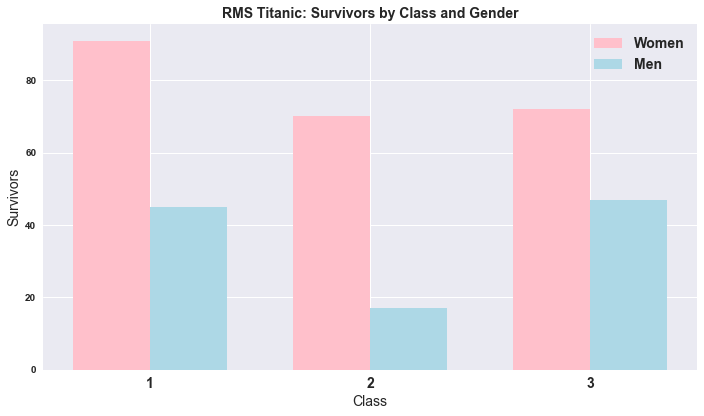

In [18]:
# The code for this chart was based heavily on the sample code provided in
# the Matplotlib documentation for bar charts

n = 3
women = (class_by_gender[1]['female'], class_by_gender[2]['female'], class_by_gender[3]['female'])
men = (class_by_gender[1]['male'], class_by_gender[2]['male'], class_by_gender[3]['male'])
fig, class_gender = plt.subplots()
index = np.arange(n)
bar_width = 0.35

bars1 = plt.bar(index, women, bar_width, align='center', color='pink', label='Women')
bars2 = plt.bar(index + bar_width, men, bar_width, align='center', color='lightblue', label="Men")

plt.xlabel('Class', size=14)
plt.ylabel('Survivors', size=14)
plt.xticks(index + (bar_width/2), ('1', '2', '3'), size=14)
class_gender.set_title('RMS Titanic: Survivors by Class and Gender')
class_gender.legend()
plt.tight_layout()
plt.show()

The chart above shows the breakdown of survivors by gender and class. This chart suggests that there was a correlation between gender, class, and survival, however while the survival rates for women of different classes seemed to be fairly linearly correlated (i.e. as class goes down, the probability of survival goes down). In this case, 1st is the highest class, 3rd is the lowest. That same relationship did not appear to hold true for the men, however. I would have expected the men to follow a similar trend as the women. The data suggests that class was not nearly as clear a predictor of survival for men as it was for women. 

<h3>Analysis of Survival by Age</h3>

There are multiple tests one could do with the ages of Titanic passengers. For the purpose of this examination, I'm going to look at the average ages of survivors relative to the average ages of all passengers, categorized by class and gender. I will also look at the ages of the survivors and attempt to identify which age has the highest chance of survival. 

In [19]:
# This is just a modification of the original mean passenger ages we calculated
# in the beginning to fill missing 'Age' values. I'm also going to re-calculate the mean_ages again 
# by class instead of by gender for graphing purposes.
mean_survivor_age = t_df[t_df.Survived == 1].groupby(['Pclass', 'Sex'])['Age'].mean()
mean_ages_by_class = t_df.groupby(['Pclass', 'Sex'])['Age'].mean()

In [20]:
mean_ages_by_class

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [21]:
mean_survivor_age

Pclass  Sex   
1       female    34.906658
        male      36.807265
2       female    28.099228
        male      17.753613
3       female    20.170139
        male      23.084857
Name: Age, dtype: float64

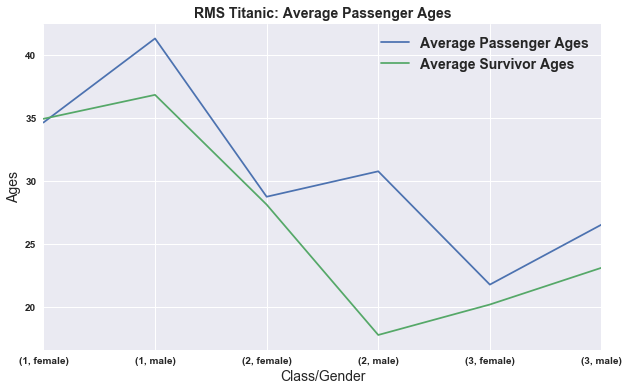

In [22]:
mean_ages_by_class.plot()
mean_survivor_age.plot()
plt.legend(['Average Passenger Ages', 'Average Survivor Ages'])
plt.xlabel("Class/Gender", size=14)
plt.ylabel("Ages", size=14)
plt.title("RMS Titanic: Average Passenger Ages")
plt.show()

The figure above illustrates the mean ages for male and female passengers in each of first, second, and third classes. The mean survivor age appears to trend younger than the overall mean passenger age. This could suggest an effort to save younger individuals, however the mean ages themselves are not sufficient to draw any meaningful conclusions about the correlation between age and survivability. 

In [23]:
def find_survival_by_age(df, lower, upper):
    '''
    This function takes in three arguments: a dataframe, a lower age bound, and an upper age bound and returns
    one overall data object and one survival object for ages within the lower and upper bounds. 
    '''
    age = t_df['Age']
    surv = t_df['Survived'] == 1
    overall, surv_by_age = None, None
    age_bool = ""
    if lower == None:
        age_bool = (age < upper) 
    elif upper == None:
        age_bool = (age >= lower)
    else:
        if lower < upper:
            age_bool = (age >= lower) & (age < upper)
        else:
            return "Sorry, lower age must be less than upper age."
    
    overall = df[age_bool].groupby(['Pclass', 'Sex'])['Age']
    surv_by_age = df[age_bool & surv].groupby(['Pclass', 'Sex'])['Age']
    
    return overall, surv_by_age
    

def find_survival_rate(all_obj, surv_obj):
    '''
    This function takes in two arguments and returns a normalized rate of survival
    '''
    return surv_obj.value_counts().sum() / all_obj.value_counts().sum() * 100

def print_survival_rate(string, n):
    '''
    This function takes in two arguments: a string to help format the output, and a percentage. 
    This could have been incorporated into the 'find_survival_rate' function, but it wasn't
    '''
    print("The overall {} survival rate is: {:3.2f}%".format(string, n))

def graph_survival(all_obj, surv_obj, label, title, top_age):
    '''
    This function takes in 5 arguments: an overall 'groupby' object, a survival 'groupby' object, a string for
    a label, a string for the graph title, and an integer for the top-end of the age range reflected in the 
    graph. The function generates a graph broken down by class showing the overall number of passengers by
    gender, overlaid with the number of survivors for each category.
    '''
    n = 3
    w_under, m_under, w_surv, m_surv = [], [], [], []
    for i in range(3):
        try:
            w_under.append(all_obj.value_counts()[i + 1]['female'].sum())
        except:
            w_under.append(0)
    
    for j in range(3):
        try:
            m_under.append(all_obj.value_counts()[j + 1]['male'].sum())
        except:
            m_under.append(0)
    
    for k in range(3):
        try:
            w_surv.append(surv_obj.value_counts()[k + 1]['female'].sum())
        except:
            w_surv.append(0)
    
    for m in range(3):
        try:
            m_surv.append(surv_obj.value_counts()[m + 1]['male'].sum())
        except:
            m_surv.append(0)
            
    fig, ax = plt.subplots()
    index = np.arange(n)
    bar_width = 0.35

    bars1 = plt.bar(index, w_under, bar_width, align='center', color='pink', label='Female ' + label)
    bars2 = plt.bar(index + bar_width, m_under, bar_width, align='center', color='lightblue', label='Male ' + label)
    bars3 = plt.bar(index, w_surv, bar_width - 0.1, align='center', color='magenta', 
                    label='Female survivors ' + label)
    bars4 = plt.bar(index + bar_width, m_surv, bar_width - 0.1, align='center', color='cyan',
                   label='Male survivors ' + label)

    plt.xlabel('Class', size=14)
    plt.ylabel('Survivors', size=14)
    plt.xticks(index + (bar_width/2), ('1', '2', '3'), size=14)
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()

In [24]:
# Find the overall and survival data for different age ranges
under_ten, under_ten_surv = find_survival_by_age(t_df, None, 10)
under_twenty, under_twenty_surv = find_survival_by_age(t_df, 10, 20)
under_thirty, under_thirty_surv = find_survival_by_age(t_df, 20, 30)
under_forty, under_forty_surv = find_survival_by_age(t_df, 30, 40)
under_fifty, under_fifty_surv = find_survival_by_age(t_df, 40, 50)
under_sixty, under_sixty_surv = find_survival_by_age(t_df, 50, 60)
over_sixty, over_sixty_surv = find_survival_by_age(t_df, 60, None)

In [25]:
# Find the rates of survival for each age group. These rates represent the overall
# survival rate for the respective age groups, and do not take gender or class into account
under_ten_rate = find_survival_rate(under_ten, under_ten_surv)
under_twenty_rate = find_survival_rate(under_twenty, under_twenty_surv)
under_thirty_rate = find_survival_rate(under_thirty, under_thirty_surv)
under_forty_rate = find_survival_rate(under_forty, under_forty_surv)
under_fifty_rate = find_survival_rate(under_fifty, under_fifty_surv)
under_sixty_rate = find_survival_rate(under_sixty, under_sixty_surv)
over_sixty_rate = find_survival_rate(over_sixty, over_sixty_surv)

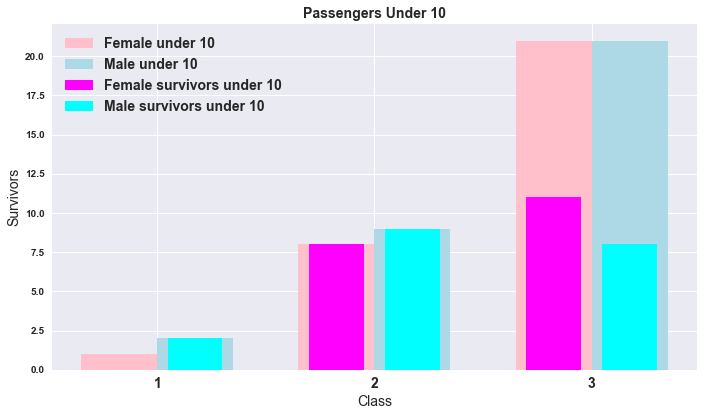

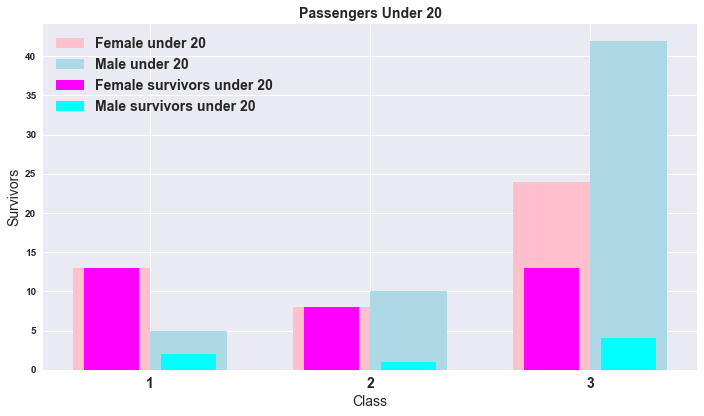

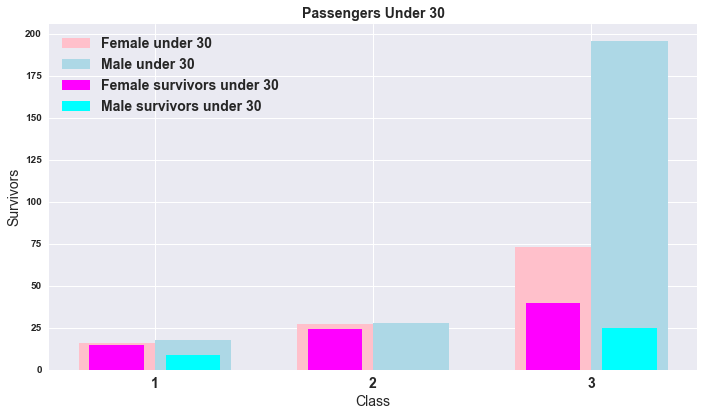

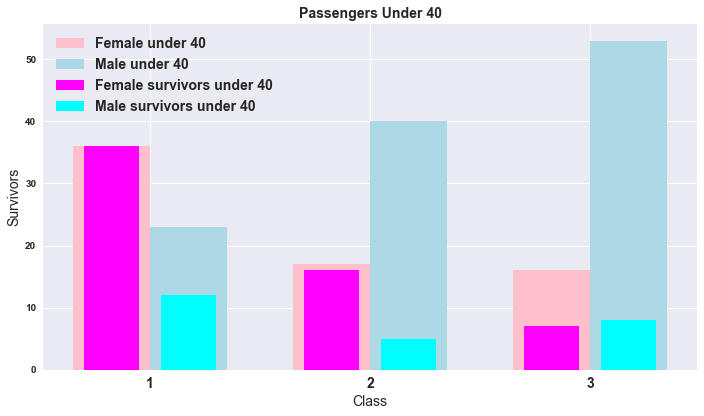

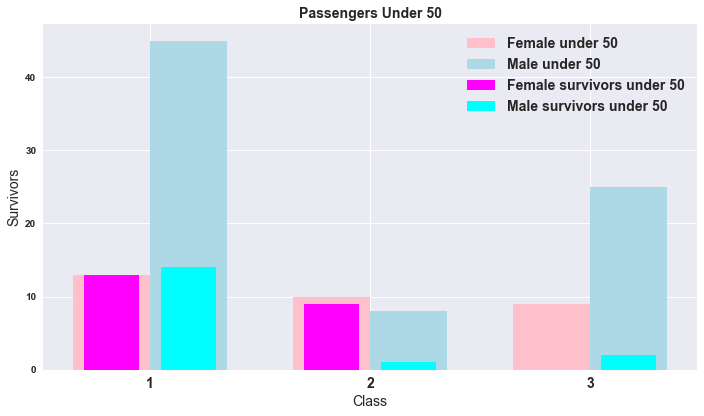

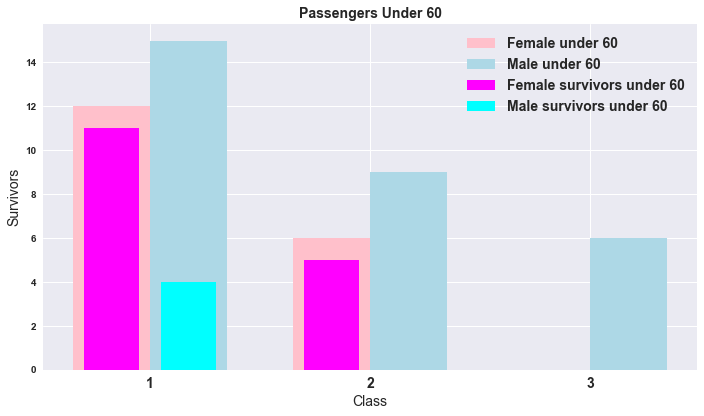

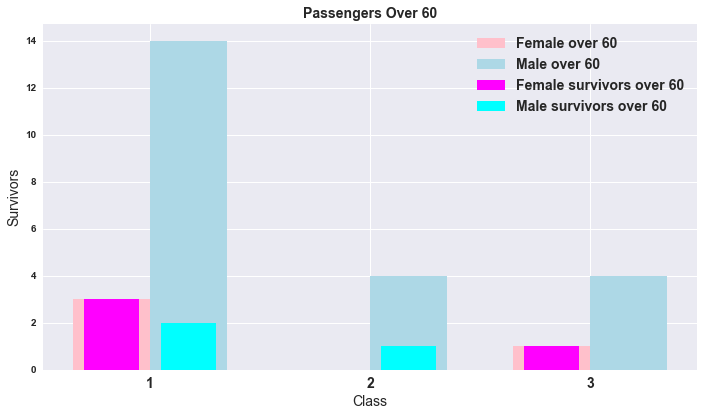

In [26]:
# Graph the survival rates relative to the total number of passengers, broken down by age group, 
# class, and gender
graph_survival(under_ten, under_ten_surv, 'under 10', 'Passengers Under 10', 10)
graph_survival(under_twenty, under_twenty_surv, 'under 20', 'Passengers Under 20', 20)
graph_survival(under_thirty, under_thirty_surv, 'under 30', 'Passengers Under 30', 30)
graph_survival(under_forty, under_forty_surv, 'under 40', 'Passengers Under 40', 40)
graph_survival(under_fifty, under_fifty_surv, 'under 50', 'Passengers Under 50', 50)
graph_survival(under_sixty, under_sixty_surv, 'under 60', 'Passengers Under 60', 60)
graph_survival(over_sixty, over_sixty_surv, 'over 60', 'Passengers Over 60', 60)

In [27]:
print_survival_rate('under 10', under_ten_rate)
print_survival_rate('under 20', under_twenty_rate)
print_survival_rate('under 30', under_thirty_rate)
print_survival_rate('under 40', under_forty_rate)
print_survival_rate('under 50', under_fifty_rate)
print_survival_rate('under 60', under_sixty_rate)
print_survival_rate('over 60', over_sixty_rate)

The overall under 10 survival rate is: 61.29%
The overall under 20 survival rate is: 40.20%
The overall under 30 survival rate is: 31.56%
The overall under 40 survival rate is: 45.41%
The overall under 50 survival rate is: 35.45%
The overall under 60 survival rate is: 41.67%
The overall over 60 survival rate is: 26.92%


These figures suggest that age is somewhat correlated to survival, however most predominantly in the lower age ranges (i.e. under 10). The survival rate for passengers under 10 was approximately 61.29%, while at the higher age ranges, survival rates drop off significantly. These rates reflect overall survival for that age bracket, and do not account for class or gender, which appear to be much more significant predictors of survival. 

<h2>Conclusion</h2>

This analysis revealed much higher survival rates for women and children across all classes than for for men of any class or age. The addage "Women and children first" appears to have held true here, with the probability of survival for women hovering just over 74%, and children under 10 having a greater than 61% probability of survival. Conversely, men across all classes had a probability of survival of less than 19%. Gender seems to have been most strongly correlated to survival, with class factoring in to a lesser degree. Age did not appear to have as significant an impact as the other two factors. 